## Decision Tree Classifier

**Karina Huang, Lipika Ramaswamy**

---

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import os
os.chdir('../qii_analysis/')
from qii_upd import intervene, random_intervene_point, unary_individual_influence, shapley_influence
os.chdir('../models/')
pd.set_option('display.max_columns', 500)

import pickle

In [2]:
data = pd.read_csv('../data/data_final.csv', index_col = ['Unnamed: 0'])
#check data
data.head()

,id,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,decile_score,score_text,is_recid,v_decile_score,v_score_text,is_violent_recid,two_year_recid
0,1,Male,69,Other,0,0,0,0,1,Low,0,1,Low,0,0
1,3,Male,34,African-American,0,0,0,0,3,Low,1,1,Low,1,1
2,4,Male,24,African-American,0,0,1,4,4,Low,1,3,Low,0,1
3,5,Male,23,African-American,0,1,0,1,8,High,0,6,Medium,0,0
4,6,Male,43,Other,0,0,0,2,1,Low,0,1,Low,0,0


In [3]:
#get dummy variables
data_new = pd.get_dummies(data, columns = ['sex', 'race'])

In [4]:
#set predictor and response columns
predictors = ['age', 'juv_misd_count', 'priors_count', 'sex_Female', 
              'sex_Male', 'race_African-American', 'race_Asian', 
              'race_Caucasian', 'race_Hispanic', 'race_Native American', 'race_Other']
# genR = ['decile_score']
genR = ['score_text']
# vR = ['v_decile_score']
vR = ['v_score_text']

In [5]:
#train test split data 
train, test = train_test_split(data_new, test_size = 0.20, random_state = 221)

In [6]:
test.head()

,id,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,decile_score,score_text,is_recid,v_decile_score,v_score_text,is_violent_recid,two_year_recid,sex_Female,sex_Male,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other
2727,4162,25,4,0,0,13,10,High,1,9,High,0,1,0,1,1,0,0,0,0,0
1298,1987,54,0,0,0,4,2,Low,0,1,Low,0,0,0,1,0,0,1,0,0,0
3234,4948,29,0,0,0,1,4,Low,0,2,Low,0,0,0,1,0,0,1,0,0,0
4956,7546,21,1,0,3,2,10,High,1,8,High,0,0,0,1,0,0,1,0,0,0
1828,2771,37,0,0,0,3,1,Low,0,1,Low,0,0,0,1,0,0,1,0,0,0


In [7]:
def getXY(df, pred, resp):
    
    X = df[pred]
    Y = df[resp]
    
    return X, Y

def getModel(df, pred, resp):
    
    m = DecisionTreeClassifier(random_state = 221)
    x, y = getXY(df, pred, resp)
    m.fit(x, y)
    
    return m

In [8]:
#model for general decile score
mG = getModel(train, predictors, genR)
#model for violence decile score
mV = getModel(train, predictors, vR)

In [9]:
#get test predictions
test_predG = mG.predict(getXY(test, predictors, genR)[0])
test_predV = mV.predict(getXY(test, predictors, genR)[0])

#get training predictions
train_predG = mG.predict(getXY(train, predictors, vR)[0])
train_predV = mV.predict(getXY(train, predictors, vR)[0])

In [10]:
#get test prediction accuracy scores
test_accG = accuracy_score(getXY(test, predictors, genR)[1], test_predG)
test_accV = accuracy_score(getXY(test, predictors, vR)[1], test_predV)

#get training prediction accuracy scores
train_accG = accuracy_score(getXY(train, predictors, genR)[1], train_predG)
train_accV = accuracy_score(getXY(train, predictors, vR)[1], train_predV)

print('Training Prediction Accuracy Score: ')
print('General Decile Score: ', train_accG)
print('Violence Decile Score: ', train_accV)
print()
print('Test Prediction Accuracy Score: ')
print('General Decile Score: ', test_accG)
print('Violence Decile Score: ', test_accV)

Training Prediction Accuracy Score: 
General Decile Score:  0.767631259747011
Violence Decile Score:  0.8400623808698666

Test Prediction Accuracy Score: 
General Decile Score:  0.5876645876645876
Violence Decile Score:  0.7172557172557172


In [11]:
#get test prediction f1 scores
test_f1G = f1_score(getXY(test, predictors, genR)[1], test_predG, average = 'weighted')
test_f1V = f1_score(getXY(test, predictors, vR)[1], test_predV, average = 'weighted')

#get training prediction f1 scores
train_f1G = f1_score(getXY(train, predictors, genR)[1], train_predG, average = 'weighted')
train_f1V = f1_score(getXY(train, predictors, vR)[1], train_predV, average = 'weighted')

print('Training Prediction F1 Score: ')
print('General Decile Score: ', train_f1G)
print('Violence Decile Score: ', train_f1V)
print()
print('Test Prediction F1 Score: ')
print('General Decile Score: ', test_f1G)
print('Violence Decile Score: ', test_f1V)

Training Prediction F1 Score: 
General Decile Score:  0.7572771651668888
Violence Decile Score:  0.8325964921486614

Test Prediction F1 Score: 
General Decile Score:  0.5665028989679454
Violence Decile Score:  0.7062823700211605


## QIIs

### QII for individual outcomes

In [12]:
unary_individual_influence(dataset = test, 
                           cls = mG, 
                           x_ind = 4956, 
                           varList = ['priors_count'], 
                           binary = [False],
                           predictors = predictors)

{'priors_count': 0.8586278586278586}

In [13]:
all_indices = list(test.index)
# list of values of whether a variable is binary or not 
binary_vals = [False, False, False, 
               True, True,
               True, True, 
               True, True, 
               True, True]

In [14]:
# all_results = {}
# for pred in predictors:
#     all_results[pred] = []

# for key, ind in enumerate(all_indices):
#     if key % 20 == 0:
#         print(key)
#     evaluate = unary_individual_influence(dataset = test,
#                                           cls = mV, 
#                                           x_ind = ind, 
#                                           varList = predictors, 
#                                           binary = binary_vals,
#                                           predictors=predictors)
#     for pred in predictors:
#         all_results[pred].append(evaluate[pred])

In [15]:
# # get_avg
# mean_ = {}
# var_ = {}
# for pred in predictors:
#     get_all = all_results[pred]
#     mean_[pred] = np.mean(get_all)
#     var_[pred] = np.var(get_all)

In [16]:
# with open('means_individualQ11_modelG.pkl', 'wb') as handle:
#     pickle.dump(mean_, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('means_individualQ11_modelG.pkl', 'rb') as handle:
    mean_ = pickle.load(handle)

''

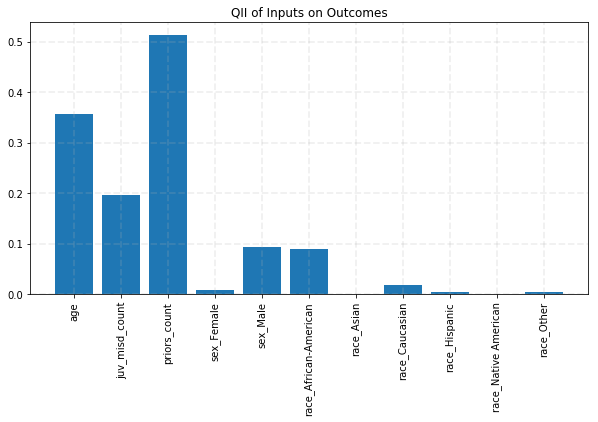

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(range(len(mean_.keys())),mean_.values())
plt.xticks(ticks = range(len(mean_.keys())), labels = mean_.keys(), rotation = 90)
plt.title('QII of Inputs on Outcomes')
plt.grid(True, lw=1.75, ls='--', alpha=0.2) # thanks bharvz
# plt.
;

## Set and Marginal QII



In [19]:
X_test, y_test = getXY(test, predictors, genR)

In [20]:
X_test.head()

,age,juv_misd_count,priors_count,sex_Female,sex_Male,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other
2727,25,0,13,0,1,1,0,0,0,0,0
1298,54,0,4,0,1,0,0,1,0,0,0
3234,29,0,1,0,1,0,0,1,0,0,0
4956,21,0,2,0,1,0,0,1,0,0,0
1828,37,0,3,0,1,0,0,1,0,0,0


In [27]:
shapley_influence(dataset=X_test, 
                  cls = mV, 
                  x_ind = 4956, 
                  X_test = X_test, 
                  varList = ['juv_misd_count', 'priors_count', 'race_African-American' ], 
                 predictors = predictors)

{'juv_misd_count': 0.020663888888888836,
 'priors_count': 0.02711388888888875,
 'race_African-American': 0.023888888888888793}

In [22]:
test.head()

,id,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,decile_score,score_text,is_recid,v_decile_score,v_score_text,is_violent_recid,two_year_recid,sex_Female,sex_Male,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other
2727,4162,25,4,0,0,13,10,High,1,9,High,0,1,0,1,1,0,0,0,0,0
1298,1987,54,0,0,0,4,2,Low,0,1,Low,0,0,0,1,0,0,1,0,0,0
3234,4948,29,0,0,0,1,4,Low,0,2,Low,0,0,0,1,0,0,1,0,0,0
4956,7546,21,1,0,3,2,10,High,1,8,High,0,0,0,1,0,0,1,0,0,0
1828,2771,37,0,0,0,3,1,Low,0,1,Low,0,0,0,1,0,0,1,0,0,0
